In [1]:
import numpy
import pandas

In [2]:
df = pandas.read_csv('spam.csv', encoding="ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3485,ham,"Yeah, probably earlier than that",NaN,NaN,NaN
2727,ham,Whatsup there. Dont u want to sleep,NaN,NaN,NaN
4638,ham,Of course. I guess god's just got me on hold r...,NaN,NaN,NaN
2261,ham,Did you show him and wot did he say or could u...,NaN,NaN,NaN
1372,ham,1) Go to write msg 2) Put on Dictionary mode 3...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# droping last three columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [9]:
df.sample(5)

,v1,v2
155,ham,Aaooooright are you at work?
1983,ham,I wnt to buy a BMW car urgently..its vry urgen...
1687,spam,Free Top ringtone -sub to weekly ringtone-get ...
5161,ham,Lol no. I just need to cash in my nitros. Hurr...
33,ham,For fear of fainting with the of all that hous...


In [10]:
# renaming columns
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)
df.sample(5)

,target,text
959,ham,Where @
298,ham,I cant pick the phone right now. Pls send a me...
1746,ham,I don know account details..i will ask my mom ...
4709,ham,Ya i knw u vl giv..its ok thanks kano..anyway ...
690,ham,Was the farm open?


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicate values
df.duplicated().sum()

403

In [18]:
# removing duplicates
df = df.drop_duplicates(keep = 'first')

In [19]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

# 2.EDA

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

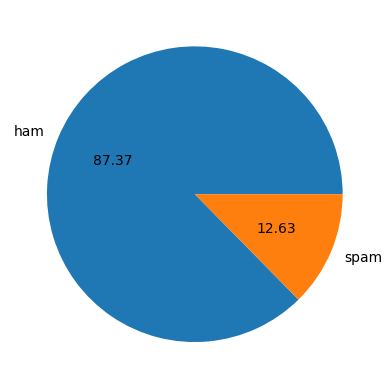

In [24]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [25]:
# imbalance in data as we can see in the pie chart above

In [27]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vishwas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [28]:
df['num_characters'] = df['text'].apply(len)

C:\Users\Vishwas\AppData\Local\Temp\ipykernel_19816\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# fetching number of words using nltk

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Vishwas\AppData\Local\Temp\ipykernel_19816\1494779686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
# fetching number of sentences using nltk

df['num_sentencess'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Vishwas\AppData\Local\Temp\ipykernel_19816\115517633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentencess'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [33]:
df.head()

,target,text,num_characters,num_words,num_sentencess
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters', 'num_words', 'num_sentencess']].describe()

,num_characters,num_words,num_sentencess
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# ham sms

df[df['target'] == 0][['num_characters', 'num_words', 'num_sentencess']].describe()

,num_characters,num_words,num_sentencess
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# spam sms

df[df['target'] == 1][['num_characters', 'num_words', 'num_sentencess']].describe()

,num_characters,num_words,num_sentencess
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

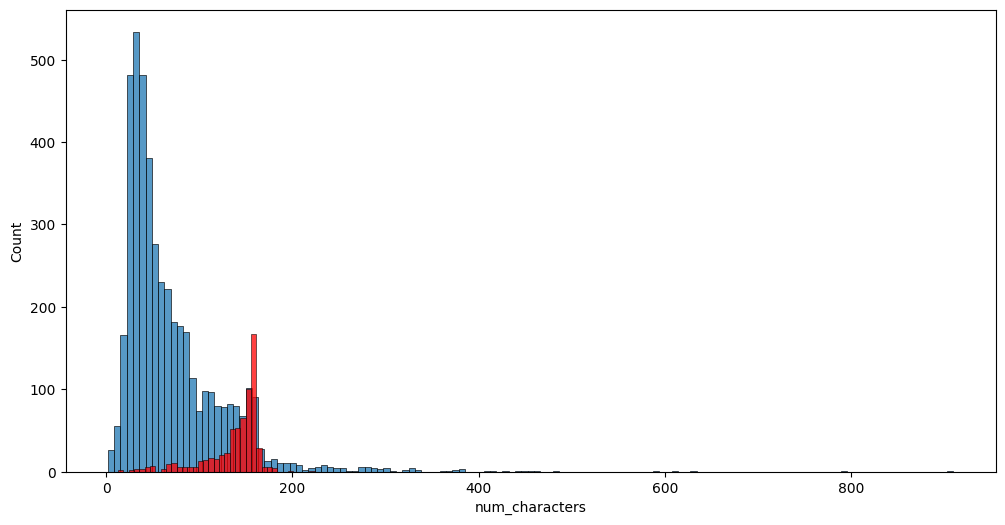

In [43]:
plt.figure(figsize = (12, 6))

# ham
sns.histplot(df[df['target'] == 0]['num_characters'])

# spam
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

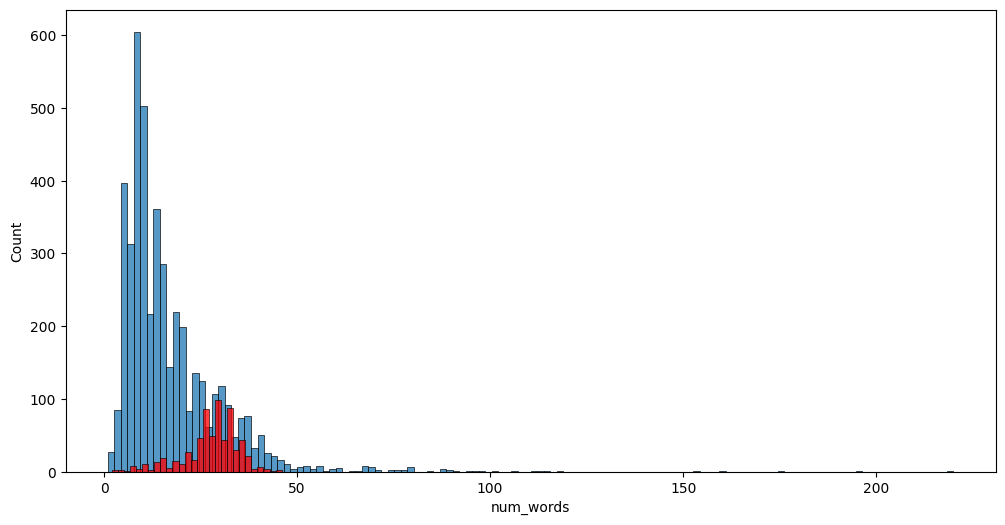

In [44]:
plt.figure(figsize = (12, 6))

# ham
sns.histplot(df[df['target'] == 0]['num_words'])

# spam
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

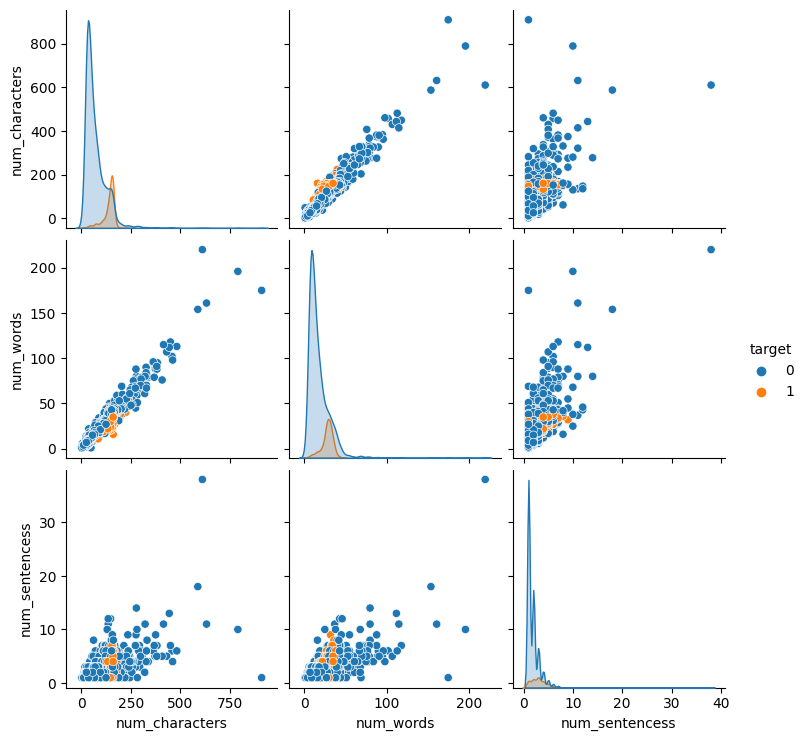

In [45]:
# relationship among attributes

sns.pairplot(df, hue = 'target')

<Axes: >

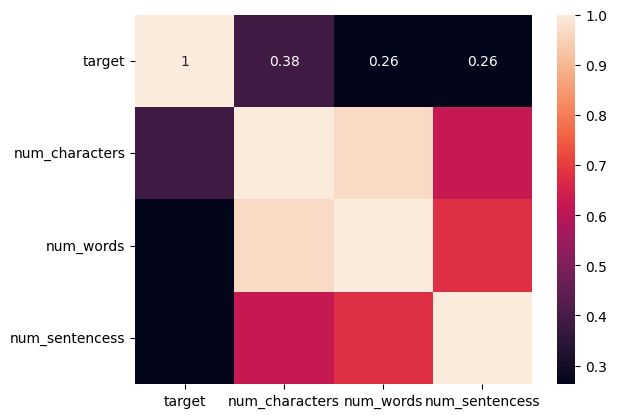

In [48]:
# co-relation

sns.heatmap(df.corr(), annot = True)

# 3. Data Processing

* Lower case
* Tokenization
* Removing special characters
* Removing punctuations
* Stemming

In [56]:
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

import string

# function to perform data processing
def transform_text(text):
    
    # lower case
    text = text.lower()
    
    # tokenize into words
    text = nltk.word_tokenize(text)
    
    # removing special chars
    remspec = []
    for x in text:
        if x.isalnum():
            remspec.append(x)
    text = remspec[:]
    remspec.clear()
    
    # removing stopwords and punctuations
    for x in text:
        if x not in stopwords.words('english') and x not in string.punctuation:
            remspec.append(x)
    text = remspec[:]
    remspec.clear()
    
    # stemming
    ps = PorterStemmer()
    for x in text:
        remspec.append(ps.stem(x))
        
    return " ".join(remspec)

In [57]:
transform_text('This is the project work on ML I am currently working on. I have plenty of ideas and will make those projects too after completing this one. What about you?')

'project work ml current work plenti idea make project complet one'

In [58]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [59]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Vishwas\AppData\Local\Temp\ipykernel_19816\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [60]:
df.head()

,target,text,num_characters,num_words,num_sentencess,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [74]:
from wordcloud import WordCloud

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [75]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

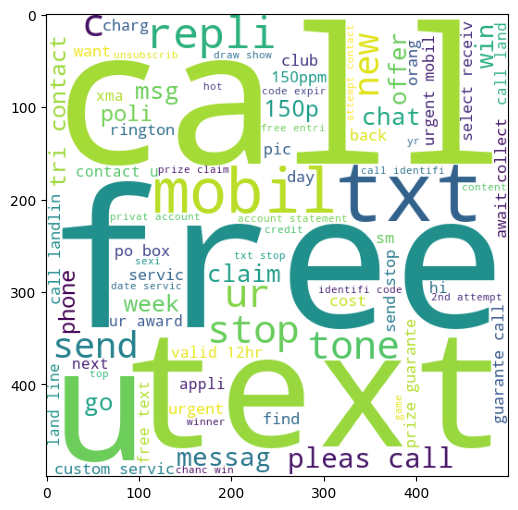

In [76]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

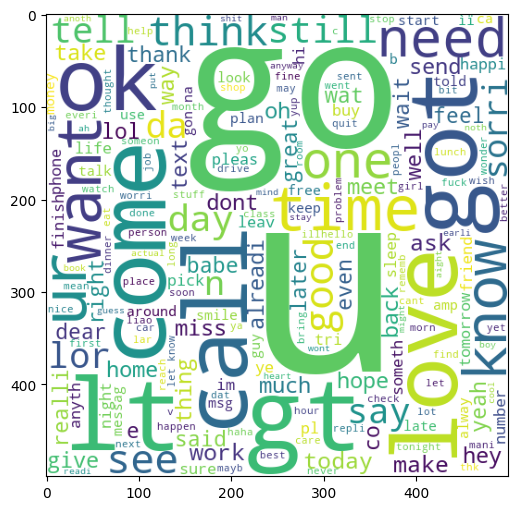

In [77]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [78]:
# selecting top words or most used words in perticular categories

In [79]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [84]:
from collections import Counter
# counter will create a dictionary for word counts
# and then we will retrive most common words
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

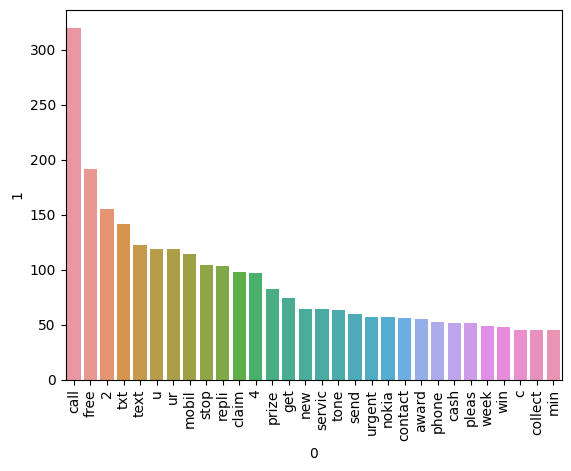

In [90]:
# plotting

sns.barplot(x = pandas.DataFrame(Counter(spam_corpus).most_common(30))[0], 
            y = pandas.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

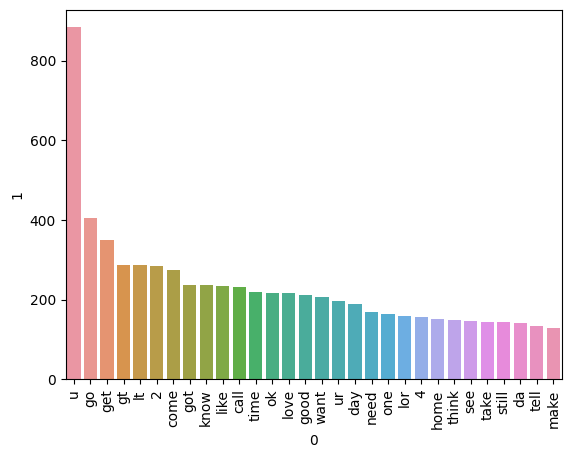

In [92]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

Counter(ham_corpus).most_common(30)

sns.barplot(x = pandas.DataFrame(Counter(ham_corpus).most_common(30))[0], 
            y = pandas.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()